In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definindo nomes das colunas

O Dataset traz os nomes das colunas separados dos dados. Para fins de visualização, estes nomes são recuperados manualmente a seguir.

In [2]:
numeric_columns = [
    "Elevation",
    "Aspect",
    "Slope",
    "Hydrology_Hdst",
    "Hydrology_Vdst",
    "Roadways_Hdst",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "FirePoints_Hdst",
]

wilderness_area_columns = [
    "WA_Rawah",
    "WA_Neota",
    "WA_Comanche_P",
    "WA_Cache_la_P"
]

soil_columns = []
for i in range(1,41):
    soil_columns.append("Soil_Type_{}".format(i))

column_names = numeric_columns + wilderness_area_columns + soil_columns + ["Cover_Type"]

print(column_names)
print("Total de colunas: " + str(len(column_names)))

['Elevation', 'Aspect', 'Slope', 'Hydrology_Hdst', 'Hydrology_Vdst', 'Roadways_Hdst', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'FirePoints_Hdst', 'WA_Rawah', 'WA_Neota', 'WA_Comanche_P', 'WA_Cache_la_P', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type']
Total de colunas: 55


# Carregando o dataset

In [3]:
pd.set_option('display.max_columns', None) # Mostra todas as colunas
df = pd.read_csv('covtype.data', names=column_names)
# df = pd.read_csv('covtype.data/covtype.data', names=column_names, nrows = 1000)
df

,Elevation,Aspect,Slope,Hydrology_Hdst,Hydrology_Vdst,Roadways_Hdst,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,FirePoints_Hdst,WA_Rawah,WA_Neota,WA_Comanche_P,WA_Cache_la_P,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


# Desfazendo formatações
Como esse dataset já vinha com algumas formatações, como One Hot Enconding, fez-se necessário desfazer, de modo que possamos analisar os dados de maneira mais íntegra.

## Removendo One-Hot-Encondings(SoilType)

In [4]:
# Seleciona o nome da coluna de solo correspondente para cada entrada
soil_decoded = (df[soil_columns] == 1).idxmax(1)

# Passa a string para um valor numérico correspondendo ao seu
# codigo de solo constante no arquivo .info.
# Isto é, "Soil_Type_1" passa a ser apenas 1.
# (13 é o índice da última coluna que antecede as coluna
# de solo no dataset)
soil_decoded = soil_decoded.map(lambda x : df.columns.get_loc(x) - 13)
soil_decoded

0         29
1         29
2         12
3         30
4         29
          ..
581007     2
581008     2
581009     2
581010     2
581011     2
Length: 581012, dtype: int64

In [5]:
df['Soil_Type'] = soil_decoded

## Informações básicas sobre os atributos do dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 56 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Elevation        581012 non-null  int64
 1   Aspect           581012 non-null  int64
 2   Slope            581012 non-null  int64
 3   Hydrology_Hdst   581012 non-null  int64
 4   Hydrology_Vdst   581012 non-null  int64
 5   Roadways_Hdst    581012 non-null  int64
 6   Hillshade_9am    581012 non-null  int64
 7   Hillshade_Noon   581012 non-null  int64
 8   Hillshade_3pm    581012 non-null  int64
 9   FirePoints_Hdst  581012 non-null  int64
 10  WA_Rawah         581012 non-null  int64
 11  WA_Neota         581012 non-null  int64
 12  WA_Comanche_P    581012 non-null  int64
 13  WA_Cache_la_P    581012 non-null  int64
 14  Soil_Type_1      581012 non-null  int64
 15  Soil_Type_2      581012 non-null  int64
 16  Soil_Type_3      581012 non-null  int64
 17  Soil_Type_4      581012 non-n

## Formatando os nomes
Adicionando nomes na coluna de COVER_TYPE para melhor compreensão dos dados


In [7]:
def forest(x):
    if x==1:
        return 'Spruce/Fir'
    elif x==2:
        return 'Lodgepole Pine'
    elif x==3:
        return 'Ponderosa Pine'
    elif x==4:
        return 'Cottonwood/Willow'
    elif x==5:
        return 'Aspen'
    elif x==6:
        return 'Douglas-fir'
    elif x==7:
        return 'Krummholz'
    
df['Cover_Type'] = df['Cover_Type'].apply(lambda x: forest(x))
df['Cover_Type']

0                  Aspen
1                  Aspen
2         Lodgepole Pine
3         Lodgepole Pine
4                  Aspen
               ...      
581007    Ponderosa Pine
581008    Ponderosa Pine
581009    Ponderosa Pine
581010    Ponderosa Pine
581011    Ponderosa Pine
Name: Cover_Type, Length: 581012, dtype: object

## Análise exploratória visual
Vizualização dos valores das colunas numéricas em histograma.

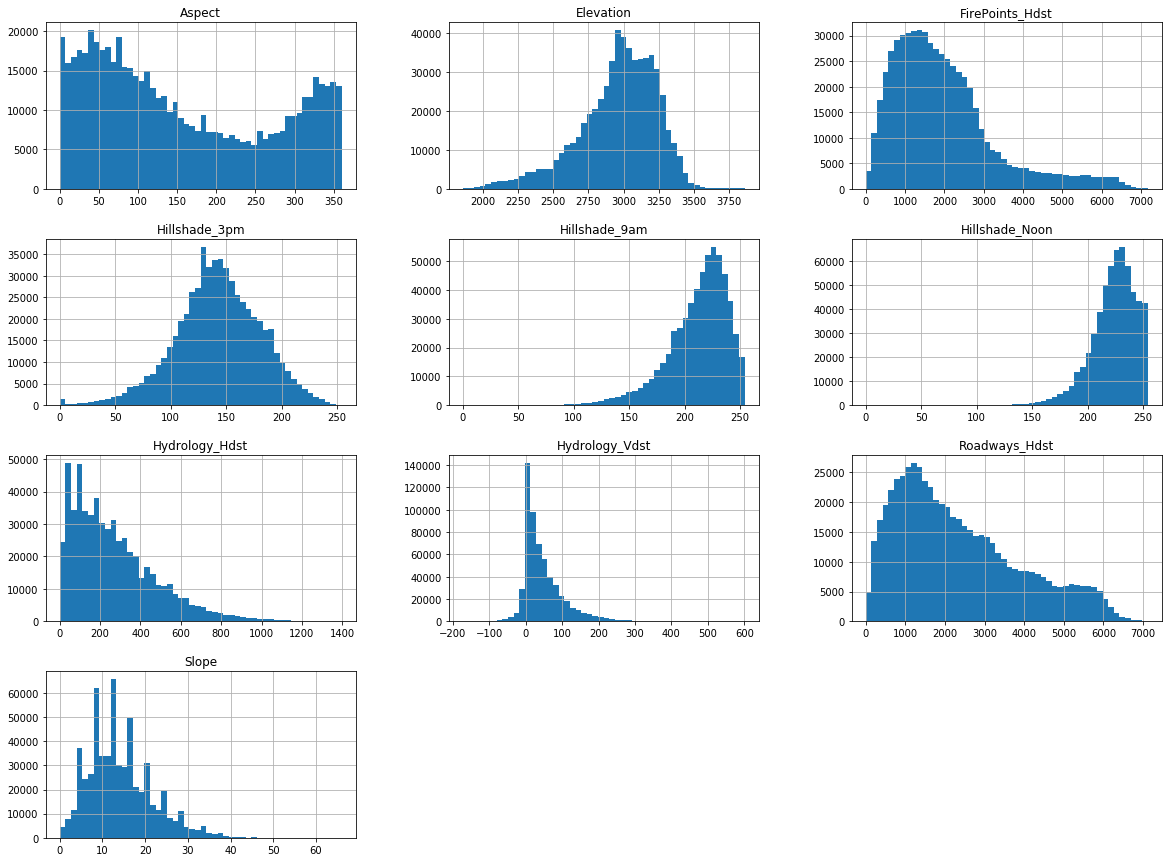

In [8]:
import matplotlib.pyplot as plt

df[numeric_columns].hist(bins=50, figsize=(20,15))
plt.show()

Quantidade de entradas para cada um dos 40 tipos de solo:

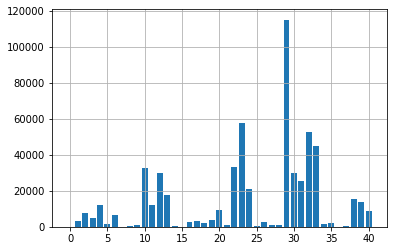

In [9]:
df["Soil_Type"].hist(bins=range(42), align='left', rwidth=0.8)

Quantidade de entradas para cada tipo de cobertura florestal (atributo alvo):

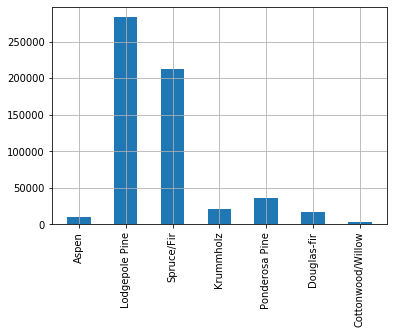

In [10]:
df["Cover_Type"].hist(bins=range(8), align='left', rwidth=0.5)
plt.xticks(rotation = 90)
plt.show()

Para ter um maior domínio sobre o dataset, foram plotados alguns gráficos com a intenção de buscar relações que possam existir entre as colunas.

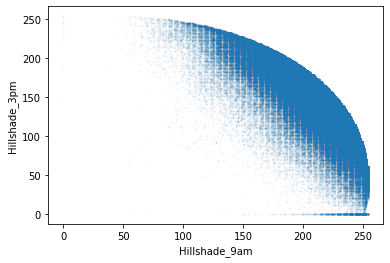

In [11]:
df.plot.scatter(x='Hillshade_9am', y='Hillshade_3pm', s=1, alpha=0.05)
plt.show()

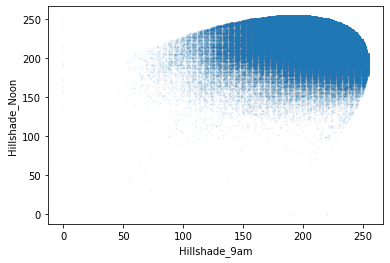

In [12]:
df.plot.scatter(x='Hillshade_9am', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

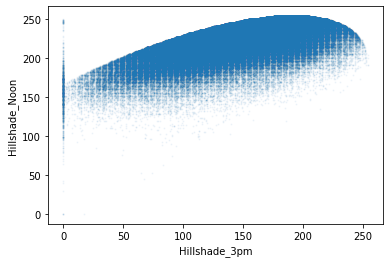

In [13]:
df.plot.scatter(x='Hillshade_3pm', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

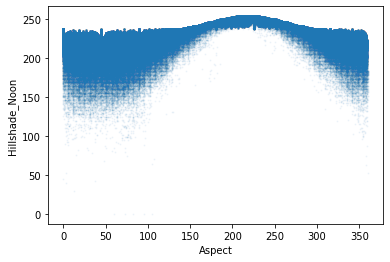

In [14]:
df.plot.scatter(x='Aspect', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

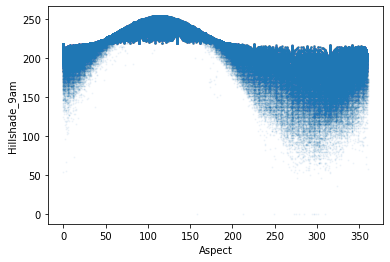

In [15]:
df.plot.scatter(x='Aspect', y='Hillshade_9am', s=1, alpha=0.05)
plt.show()

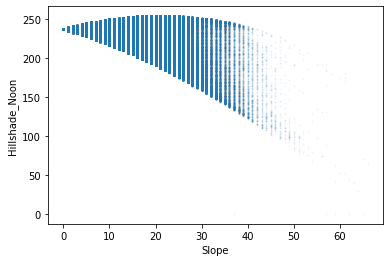

In [16]:
df.plot.scatter(x='Slope', y='Hillshade_Noon', s=1, alpha=0.05)
plt.show()

## Analisando as correlações entre as colunas numéricas

In [ ]:
# Diminuir o numero de entradas usadas em head() se este plot estiver demorando demais
sct_mat = pd.plotting.scatter_matrix(df[numeric_columns].head(100000),figsize=(20, 20), s=1)
plt.show()

A tabela a seguir mostra a correlação de Pearson para cada uma das combinações de atributos numéricos do dataset.

Nenhum dos pares de colunas possui correlação que justifique a retirada de alguma das colunas do dataset para fins de treinamento.

In [ ]:
corr_matrix = pd.DataFrame(np.corrcoef(df[numeric_columns], rowvar=False), index=numeric_columns, columns=numeric_columns)

color_map = sns.diverging_palette(260, 10, l=60, s=60, sep=10, as_cmap=True)

corr_matrix.style.background_gradient(color_map, axis=None, vmin=-1, vmax=1)
